In [71]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import scipy.stats  as stats

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
best = pd.read_csv("ensemble.csv")
best.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_evaluation,1.114996,0.522792,0.663883,0.421599,0.637514,0.721305,0.515454,1.067955,0.917557,...,0.832875,0.781397,0.570051,0.797964,0.835928,0.546839,0.487573,0.732055,0.682239,0.356935
1,FOODS_1_001_CA_2_evaluation,0.744752,0.919919,0.739570,0.757543,0.487540,0.834682,1.545231,0.815644,0.794967,...,0.761403,0.793199,1.577074,0.897968,0.977850,0.833511,0.768898,0.798879,0.833113,1.223009
2,FOODS_1_001_CA_3_evaluation,0.773044,0.570032,0.719382,0.645887,1.358012,1.437115,1.437078,0.795078,0.649588,...,0.745030,1.011404,1.143345,0.447391,0.364692,0.473768,0.352993,0.986664,1.091694,1.089477
3,FOODS_1_001_CA_4_evaluation,0.490972,0.282165,0.280232,0.254937,0.310352,0.302319,0.309250,0.547848,0.275726,...,0.298282,0.272954,0.259964,0.333647,0.234402,0.264342,0.251742,0.283034,0.278068,0.085245
4,FOODS_1_001_TX_1_evaluation,0.325808,0.332319,0.379951,0.305715,0.386758,0.293995,0.444414,0.384631,0.389729,...,0.282309,0.303892,0.367092,0.286753,0.461235,0.275061,0.317250,0.335949,0.293809,0.400859


In [74]:
sales = pd.read_csv("/content/drive/MyDrive/sales_train_validation.csv")
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [75]:
sub = best.merge(sales[["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"]], on = "id")
sub["_all_"] = "Total"
sub.shape

(30490, 35)

In [76]:
sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F25,F26,F27,F28,item_id,dept_id,cat_id,store_id,state_id,_all_
0,FOODS_1_001_CA_1_validation,0.722432,0.591827,0.580754,0.579958,0.815359,0.682956,0.532700,0.922008,0.623999,...,0.484605,0.702087,0.718765,0.528460,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,Total
1,FOODS_1_001_CA_2_validation,1.063358,0.760091,0.598076,0.698987,0.503254,1.165879,0.765154,1.031192,0.749424,...,0.836643,0.531848,0.733254,1.504965,FOODS_1_001,FOODS_1,FOODS,CA_2,CA,Total
2,FOODS_1_001_CA_3_validation,0.811180,0.653323,0.695720,0.787368,0.744437,1.768113,1.252145,0.751686,0.624266,...,0.726664,0.662420,1.468969,1.708863,FOODS_1_001,FOODS_1,FOODS,CA_3,CA,Total
3,FOODS_1_001_CA_4_validation,0.529003,0.248581,0.275726,0.264687,0.323709,0.333690,0.269723,0.559774,0.248331,...,0.258758,0.327983,0.316223,0.282427,FOODS_1_001,FOODS_1,FOODS,CA_4,CA,Total
4,FOODS_1_001_TX_1_validation,0.392289,0.379719,0.354289,0.356820,0.380097,0.317430,0.530196,0.368643,0.425949,...,0.326879,0.330661,0.299615,0.396269,FOODS_1_001,FOODS_1,FOODS,TX_1,TX,Total


In [77]:
qs = np.array([0.005,0.025,0.165,0.25, 0.5, 0.75, 0.835, 0.975, 0.995])
qs.shape


def get_ratios(coef=0.15):
    qs2 = np.log(qs/(1-qs))*coef
    ratios = stats.norm.cdf(qs2)
    ratios /= ratios[4]
    ratios = pd.Series(ratios, index=qs)
    return ratios.round(3)

#coef between 0.05 and 0.24 is used, probably suboptimal values for now

level_coef_dict = {"id": get_ratios(coef=0.3), "item_id": get_ratios(coef=0.15),
                   "dept_id": get_ratios(coef=0.08), "cat_id": get_ratios(coef=0.07),
                   "store_id": get_ratios(coef=0.08), "state_id": get_ratios(coef=0.07), "_all_": get_ratios(coef=0.05),
                   ("state_id", "item_id"): get_ratios(coef=0.19),  ("state_id", "dept_id"): get_ratios(coef=0.1),
                    ("store_id","dept_id") : get_ratios(coef=0.11), ("state_id", "cat_id"): get_ratios(coef=0.08),
                    ("store_id","cat_id"): get_ratios(coef=0.1)
                  }

In [78]:
level_coef_dict["id"]

0.005    0.112
0.025    0.272
0.165    0.627
0.250    0.742
0.500    1.000
0.750    1.258
0.835    1.373
0.975    1.728
0.995    1.888
dtype: float64

In [79]:
level_coef_dict["cat_id"]

0.005    0.711
0.025    0.798
0.165    0.910
0.250    0.939
0.500    1.000
0.750    1.061
0.835    1.090
0.975    1.202
0.995    1.289
dtype: float64

In [80]:
def quantile_coefs(q, level):
    ratios = level_coef_dict[level]
               
    return ratios.loc[q].values

def get_group_preds(pred, level):
    df = pred.groupby(level)[cols].sum()
    q = np.repeat(qs, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q, level)[:, None]
    if level != "id":
        df["id"] = [f"{lev}_X_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    else:
        df["id"] = [f"{lev.replace('_validation', '')}_{q:.3f}_validation" for lev, q in zip(df[level].values, q)]
    df = df[["id"]+list(cols)]
    return df

def get_couple_group_preds(pred, level1, level2):
    df = pred.groupby([level1, level2])[cols].sum()
    q = np.repeat(qs, len(df))
    df = pd.concat([df]*9, axis=0, sort=False)
    df.reset_index(inplace = True)
    df[cols] *= quantile_coefs(q, (level1, level2))[:, None]
    df["id"] = [f"{lev1}_{lev2}_{q:.3f}_validation" for lev1,lev2, q in 
                zip(df[level1].values,df[level2].values, q)]
    df = df[["id"]+list(cols)]
    return df

levels = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id", "_all_"]
couples = [("state_id", "item_id"),  ("state_id", "dept_id"),("store_id","dept_id"),
                            ("state_id", "cat_id"),("store_id","cat_id")]

cols = [f"F{i}" for i in range(1, 29)]

df = []
for level in levels :
    df.append(get_group_preds(sub, level))
for level1,level2 in couples:
    df.append(get_couple_group_preds(sub, level1, level2))
df = pd.concat(df, axis=0, sort=False)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df,df] , axis=0, sort=False)
df.reset_index(drop=True, inplace=True)
df.loc[df.index >= len(df.index)//2, "id"] = df.loc[df.index >= len(df.index)//2, "id"].str.replace(
                                    "_validation", "_evaluation")

In [81]:
print(df.shape)

df.head()

(771120, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_0.005_validation,0.080912,0.066285,0.065044,0.064955,0.091320,0.076491,0.059662,0.103265,0.069888,...,0.080707,0.082152,0.063418,0.129924,0.062956,0.085169,0.054276,0.078634,0.080502,0.059188
1,FOODS_1_001_CA_2_0.005_validation,0.119096,0.085130,0.066984,0.078286,0.056364,0.130579,0.085697,0.115493,0.083935,...,0.063771,0.101132,0.166389,0.098931,0.083865,0.090314,0.093704,0.059567,0.082124,0.168556
2,FOODS_1_001_CA_3_0.005_validation,0.090852,0.073172,0.077921,0.088185,0.083377,0.198029,0.140240,0.084189,0.069918,...,0.075646,0.165611,0.239592,0.084406,0.063307,0.073712,0.081386,0.074191,0.164525,0.191393
3,FOODS_1_001_CA_4_0.005_validation,0.059248,0.027841,0.030881,0.029645,0.036255,0.037373,0.030209,0.062695,0.027813,...,0.034676,0.031659,0.027786,0.062490,0.027841,0.032467,0.028981,0.036734,0.035417,0.031632
4,FOODS_1_001_TX_1_0.005_validation,0.043936,0.042529,0.039680,0.039964,0.042571,0.035552,0.059382,0.041288,0.047706,...,0.037669,0.034033,0.048511,0.038725,0.042515,0.036592,0.036610,0.037034,0.033557,0.044382


In [82]:
df.to_csv("uncertainty.csv", index = False)

##Quantile Regression

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import gc

In [14]:
#============================#
def get_cat(inp):
    tokens = inp.split("_")
    return tokens[0]
#============================#
def get_dept(inp):
    tokens = inp.split("_")
    return tokens[0] + "_" + tokens[1]
#============================#

In [16]:
l12 = pd.read_csv("/content/drive/MyDrive/sales_train_evaluation.csv")
l12.id = l12.id.str.replace('_evaluation', '')

In [17]:
COLS = [f"d_{i+1}" for i in range(1941)]

In [18]:
%%time
print("State & Item")
l11 = l12.groupby(['state_id','item_id']).sum().reset_index()
l11["store_id"] = l11["state_id"]
l11["cat_id"] = l11["item_id"].apply(get_cat)
l11["dept_id"] = l11["item_id"].apply(get_dept)
l11["id"] = l11["state_id"] + "_" + l11["item_id"]
print("Item")
l10 = l12.groupby('item_id').sum().reset_index()
l10['id'] = l10['item_id'] + '_X'
l10["cat_id"] = l10["item_id"].apply(get_cat)
l10["dept_id"] = l10["item_id"].apply(get_dept)
l10["store_id"] = 'X'
l10["state_id"] = 'X'
print("Store & Dept")
l9 = l12.groupby(['store_id','dept_id']).sum().reset_index()
l9["cat_id"] = l9["dept_id"].apply(get_cat)
l9["state_id"] = l9["store_id"].apply(get_cat)
l9["item_id"] = l9["dept_id"]
l9["id"] = l9["store_id"] + '_' + l9["dept_id"]
print("Store & Cat")
l8 = l12.groupby(['store_id','cat_id']).sum().reset_index()
l8['dept_id'] = l8['cat_id']
l8['item_id'] = l8['cat_id']
l8['state_id'] = l8['store_id'].apply(get_cat)
l8["id"] = l8["store_id"] + '_' + l8["cat_id"]
print("State & Dept")
l7 = l12.groupby(['state_id','dept_id']).sum().reset_index()
l7["store_id"] = l7["state_id"]
l7["cat_id"] = l7["dept_id"].apply(get_cat)
l7["item_id"] = l7["dept_id"]
l7["id"] = l7["state_id"] + '_' + l7["dept_id"]
print("State & Cat")
l6 = l12.groupby(['state_id','cat_id']).sum().reset_index()
l6["store_id"] = l6["state_id"]
l6["dept_id"] = l6["cat_id"]
l6["item_id"] = l6["cat_id"]
l6["id"] = l6["state_id"] + "_" + l6["cat_id"]
print("Dept")
l5 = l12.groupby('dept_id').sum().reset_index()
l5["cat_id"] = l5["dept_id"].apply(get_cat)
l5["item_id"] = l5["dept_id"]
l5["state_id"] = "X"
l5["store_id"] = "X"
l5["id"] = l5["dept_id"] + "_X"
print("Cat")
l4 = l12.groupby('cat_id').sum().reset_index()
l4["store_id"] = l4["cat_id"]
l4["item_id"] = l4["cat_id"]
l4["store_id"] = "X"
l4["state_id"] = "X"
l4["id"] = l4["cat_id"] + "_X"
print("Store")
l3 = l12.groupby('store_id').sum().reset_index()
l3["state_id"] = l3["store_id"].apply(get_cat)
l3["cat_id"] = "X"
l3["dept_id"] = "X"
l3["item_id"] = "X"
l3["id"] = l3["store_id"] + "_X"
print("State")
l2 = l12.groupby('state_id').sum().reset_index()
l2["store_id"] = l2["state_id"]
l2["cat_id"] = "X"
l2["dept_id"] = "X"
l2["item_id"] = "X"
l2["id"] = l2["state_id"] + "_X"
print("Total")
l1 = l12[COLS].sum(axis=0).values
l1 = pd.DataFrame(l1).T
l1.columns = COLS
l1["id"] = 'Total_X'
l1['state_id'] = 'X'
l1['store_id'] = 'X'
l1['cat_id'] = 'X'
l1['dept_id'] = 'X'
l1['item_id'] = 'X'

State & Item
Item
Store & Dept
Store & Cat
State & Dept
State & Cat
Dept
Cat
Store
State
Total
CPU times: user 5.81 s, sys: 2.46 s, total: 8.27 s
Wall time: 8.21 s


In [19]:
df = pd.DataFrame()
df = df.append([l12, l11, l10, l9, l8, l7, l6, l5, l4, l3, l2, l1])

In [20]:
#sub = pd.read_csv("/content/drive/Mydrive/sample_submission.csv")
sub = pd.read_csv("sample_submission.csv")
sub['id'] = sub.id.str.replace('_evaluation', '')
grps =sub.iloc[-42840:, 0].unique()
grps = [col.replace("_0.995","") for col in grps]

In [21]:
for col in ['id','item_id','dept_id','cat_id','store_id','state_id']:
    print(col, df[col].nunique())

id 42840
item_id 3060
dept_id 11
cat_id 4
store_id 14
state_id 4


In [22]:
X = df[COLS].values
x = (X>0).cumsum(1)
x = x>0
st = x.argmax(1)
den = 1941 - st - 2
diff = np.abs(X[:,1:] - X[:,:-1])
norm = diff.sum(1) / den

In [23]:
df["start"] = st
df["scale"] = norm

In [24]:
sales=df

In [25]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
  

In [26]:
def autocorrelation(ys, t=1):
    return np.corrcoef(ys[:-t], ys[t:])

In [27]:
def preprocess_sales(sales, start=1400, upper=1970):
    if start is not None:
        print("dropping...")
        to_drop = [f"d_{i+1}" for i in range(start-1)]
        print(sales.shape)
        sales.drop(to_drop, axis=1, inplace=True)
        print(sales.shape)
    #=======
    print("adding...")
    new_columns = ['d_%i'%i for i in range(1942, upper, 1)]
    for col in new_columns:
        sales[col] = np.nan
    print("melting...")
    sales = sales.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id","scale","start"],
                        var_name='d', value_name='demand')

    print("generating order")
    if start is not None:
        skip = start
    else:
        skip = 1
    sales["nb"] =sales.index // 42840 + skip
    return sales

In [28]:
def preprocess_calendar(calendar):
    global maps, mods
    calendar["event_name"] = calendar["event_name_1"]
    calendar["event_type"] = calendar["event_type_1"]

    map1 = {mod:i for i,mod in enumerate(calendar['event_name'].unique())}
    calendar['event_name'] = calendar['event_name'].map(map1)
    map2 = {mod:i for i,mod in enumerate(calendar['event_type'].unique())}
    calendar['event_type'] = calendar['event_type'].map(map2)
    calendar['nday'] = calendar['date'].str[-2:].astype(int)
    maps["event_name"] = map1
    maps["event_type"] = map2
    mods["event_name"] = len(map1)
    mods["event_type"] = len(map2)
    calendar["wday"] -=1
    calendar["month"] -=1
    calendar["year"] -= 2011
    mods["month"] = 12
    mods["year"] = 6
    mods["wday"] = 7
    mods['snap_CA'] = 2
    mods['snap_TX'] = 2
    mods['snap_WI'] = 2

    calendar.drop(["event_name_1", "event_name_2", "event_type_1", "event_type_2", "date", "weekday"], 
                  axis=1, inplace=True)
    return calendar

In [34]:
def make_dataset(categorize=False ,start=1400, upper= 1970):
    global maps, mods
    print("loading calendar...")
    calendar = pd.read_csv("/content/drive/MyDrive/calendar.csv")
    print("loading sales...")
    sales =df
    cols = ["item_id", "dept_id", "cat_id","store_id","state_id"]
    if categorize:
        for col in cols:
            temp_dct = {mod:i for i, mod in enumerate(sales[col].unique())}
            mods[col] = len(temp_dct)
            maps[col] = temp_dct
        for col in cols:
            sales[col] = sales[col].map(maps[col])
        #

    sales =preprocess_sales(sales, start=start, upper= upper)
    calendar = preprocess_calendar(calendar)
    calendar = reduce_mem_usage(calendar)
    print("merge with calendar...")
    sales = sales.merge(calendar, on='d', how='left')
    del calendar
    print("reordering...")
    sales.sort_values(by=["id","nb"], inplace=True)
    print("re-indexing..")
    sales.reset_index(inplace=True, drop=True)
    gc.collect()

    sales['n_week'] = (sales['nb']-1)//7
    sales["nday"] -= 1
    mods['nday'] = 31
    sales = reduce_mem_usage(sales)
    gc.collect()
    return sales

In [35]:
%%time
CATEGORIZE = True;
START = 1400; UPPER = 1970;
maps = {}
mods = {}
sales = make_dataset(categorize=CATEGORIZE ,start=START, upper= UPPER)

loading calendar...
loading sales...
dropping...
(42840, 1949)
(42840, 550)
adding...
melting...
generating order
Mem. usage decreased to  0.04 Mb (78.4% reduction)
merge with calendar...
reordering...
re-indexing..
Mem. usage decreased to 1001.37 Mb (59.8% reduction)
CPU times: user 26.3 s, sys: 6.61 s, total: 32.9 s
Wall time: 32.9 s


In [36]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,scale,start,d,demand,...,wday,month,year,snap_CA,snap_TX,snap_WI,event_name,event_type,nday,n_week
0,CA_1_FOODS,3056,7,2,0,0,465.75,0,d_1400,2296.0,...,6,10,3,0,0,0,0,0,27,199
1,CA_1_FOODS,3056,7,2,0,0,465.75,0,d_1401,2984.0,...,0,10,3,0,0,0,0,0,28,200
2,CA_1_FOODS,3056,7,2,0,0,465.75,0,d_1402,3228.0,...,1,10,3,0,0,0,0,0,29,200
3,CA_1_FOODS,3056,7,2,0,0,465.75,0,d_1403,2868.0,...,2,11,3,1,1,0,0,0,0,200
4,CA_1_FOODS,3056,7,2,0,0,465.75,0,d_1404,2312.0,...,3,11,3,1,0,1,0,0,1,200


In [37]:
sales["x"] = sales["demand"] / sales["scale"]

In [38]:
LAGS = [28, 35, 42, 49, 56, 63]
FEATS = []
for lag in tqdm(LAGS):
    sales[f"x_{lag}"] = sales.groupby("id")["x"].shift(lag)
    FEATS.append(f"x_{lag}")

100%|██████████| 6/6 [00:15<00:00,  2.51s/it]


In [39]:
print(sales.shape)
sales = sales.loc[sales.nb>sales.start]
print(sales.shape)

(24418800, 29)
(24268220, 29)


In [40]:
nb = sales['nb'].values
MAX_LAG = max(LAGS)
#tr_mask = np.logical_and(nb>START + MAX_LAG, nb<=1913)
tr_mask = np.logical_and(nb>START + MAX_LAG, nb<=1941) # SORRY THIS IS FAKE VALIDATION. I DIDN'T THINK IT WOULD HAVE HAD LIFTED UP MY SCORE LIKE THAT
val_mask = np.logical_and(nb>1913, nb<=1941)
te_mask = np.logical_and(nb>1941, nb<=1969)

In [41]:
scale = sales['scale'].values
ids = sales['id'].values
#y = sales['demand'].values
#ys = y / scale
ys = sales['x'].values
Z = sales[FEATS].values

In [42]:
sv = scale[val_mask]
se = scale[te_mask]
ids = ids[te_mask]
ids = ids.reshape((-1, 28))

In [43]:
ca = sales[['snap_CA']].values
tx = sales[['snap_TX']].values
wi = sales[['snap_WI']].values
wday = sales[['wday']].values
month = sales[['month']].values
year = sales[['year']].values
event = sales[['event_name']].values
nday = sales[['nday']].values

In [44]:
item = sales[['item_id']].values
dept = sales[['dept_id']].values
cat = sales[['cat_id']].values
store = sales[['store_id']].values
state = sales[['state_id']].values

In [45]:
def make_data(mask):
    x = {"snap_CA":ca[mask], "snap_TX":tx[mask], "snap_WI":wi[mask], "wday":wday[mask], 
         "month":month[mask], "year":year[mask], "event":event[mask], "nday":nday[mask], 
         "item":item[mask], "dept":dept[mask], "cat":cat[mask], "store":store[mask], 
         "state":state[mask], "num":Z[mask]}
    t = ys[mask]
    return x, t

In [46]:
xt, yt = make_data(tr_mask) #train
xv, yv = make_data(val_mask) # val
xe, ye = make_data(te_mask) # test

In [47]:
import tensorflow.keras.layers as L
import tensorflow.keras.models as M
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [48]:
#=====
def qloss(y_true, y_pred):
    # Pinball loss for multiple quantiles
    qs = [0.005, 0.025, 0.165, 0.250, 0.500, 0.750, 0.835, 0.975, 0.995]
    q = tf.constant(np.array([qs]), dtype=tf.float32)
    e = y_true - y_pred
    v = tf.maximum(q*e, (q-1)*e)
    return K.mean(v)
#============================#
def make_model(n_in):
    
    num = L.Input((n_in,), name="num")
    
    ca = L.Input((1,), name="snap_CA")
    tx = L.Input((1,), name="snap_TX")
    wi = L.Input((1,), name="snap_WI")
    wday = L.Input((1,), name="wday")
    month = L.Input((1,), name="month")
    year = L.Input((1,), name="year")
    event = L.Input((1,), name="event")
    nday = L.Input((1,), name="nday")
    item = L.Input((1,), name="item")
    dept = L.Input((1,), name="dept")
    cat = L.Input((1,), name="cat")
    store = L.Input((1,), name="store")
    state = L.Input((1,), name="state")
    inp = {"snap_CA":ca, "snap_TX":tx, "snap_WI":wi, "wday":wday, 
           "month":month, "year":year, "event":event, "nday":nday,
           "item":item, "dept":dept, "cat":cat, "store":store, 
           "state":state, "num":num} 
    #
    ca_ = L.Embedding(mods["snap_CA"], mods["snap_CA"], name="ca_3d")(ca)
    tx_ = L.Embedding(mods["snap_TX"], mods["snap_TX"], name="tx_3d")(tx)
    wi_ = L.Embedding(mods["snap_WI"], mods["snap_WI"], name="wi_3d")(wi)
    wday_ = L.Embedding(mods["wday"], mods["wday"], name="wday_3d")(wday)
    month_ = L.Embedding(mods["month"], mods["month"], name="month_3d")(month)
    year_ = L.Embedding(mods["year"], mods["year"], name="year_3d")(year)
    event_ = L.Embedding(mods["event_name"], mods["event_name"], name="event_3d")(event)
    nday_ = L.Embedding(mods["nday"], mods["nday"], name="nday_3d")(nday)
    item_ = L.Embedding(mods["item_id"], 10, name="item_3d")(item)
    dept_ = L.Embedding(mods["dept_id"], mods["dept_id"], name="dept_3d")(dept)
    cat_ = L.Embedding(mods["cat_id"], mods["cat_id"], name="cat_3d")(cat)
    store_ = L.Embedding(mods["store_id"], mods["store_id"], name="store_3d")(store)
    state_ = L.Embedding(mods["state_id"], mods["state_id"], name="state_3d")(state)
    
    p = [ca_, tx_, wi_, wday_, month_, year_, event_, nday_, item_, dept_, cat_, store_, state_]
    emb = L.Concatenate(name="embds")(p)
    context = L.Flatten(name="context")(emb)
    x = L.Concatenate(name="x1")([context, num])
    x = L.Dense(500, activation="relu", name="d1")(x)
    x = L.Dropout(0.3)(x)
    x = L.Concatenate(name="m1")([x, context])
    x = L.Dense(500, activation="relu", name="d2")(x)
    x = L.Dropout(0.3)(x)
    x = L.Concatenate(name="m2")([x, context])
    x = L.Dense(500, activation="relu", name="d3")(x)
    preds = L.Dense(9, activation="linear", name="preds")(x)
    model = M.Model(inp, preds, name="M1")
    model.compile(loss=qloss, optimizer="adam")
    return model

In [49]:
net = make_model(len(FEATS))
ckpt = ModelCheckpoint("w.h5", monitor='val_loss', verbose=1, save_best_only=True,mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
es = EarlyStopping(monitor='val_loss', patience=3)
print(net.summary())

Model: "M1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 snap_CA (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 snap_TX (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 snap_WI (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 wday (InputLayer)              [(None, 1)]          0           []                               
                                                                                                 

In [50]:
net.fit(xt, yt, batch_size=50000, epochs=20, validation_data=(xv, yv), callbacks=[ckpt, reduce_lr, es])
nett = make_model(len(FEATS))
nett.load_weights("w.h5")
pv = nett.predict(xv, batch_size=50_000, verbose=1)
pe = nett.predict(xe, batch_size=50_000, verbose=1)
nett.evaluate(xv, yv, batch_size=50_000)
pv = pv.reshape((-1, 28, 9))
pe = pe.reshape((-1, 28, 9))
sv = sv.reshape((-1, 28))
se = se.reshape((-1, 28))

Epoch 1/20
407/408 [============================>.] - ETA: 0s - loss: 0.2118
Epoch 1: val_loss improved from inf to 0.22789, saving model to w.h5
408/408 [==============================] - 19s 24ms/step - loss: 0.2117 - val_loss: 0.2279 - lr: 0.0010
Epoch 2/20
408/408 [==============================] - ETA: 0s - loss: 0.2007
Epoch 2: val_loss improved from 0.22789 to 0.22411, saving model to w.h5
408/408 [==============================] - 9s 22ms/step - loss: 0.2007 - val_loss: 0.2241 - lr: 0.0010
Epoch 3/20
406/408 [============================>.] - ETA: 0s - loss: 0.1982
Epoch 3: val_loss improved from 0.22411 to 0.22218, saving model to w.h5
408/408 [==============================] - 9s 22ms/step - loss: 0.1982 - val_loss: 0.2222 - lr: 0.0010
Epoch 4/20
406/408 [============================>.] - ETA: 0s - loss: 0.1953
Epoch 4: val_loss improved from 0.22218 to 0.21918, saving model to w.h5
408/408 [==============================] - 9s 22ms/step - loss: 0.1953 - val_loss: 0.2192 - lr

HOUSEHOLD_1_491_TX_3


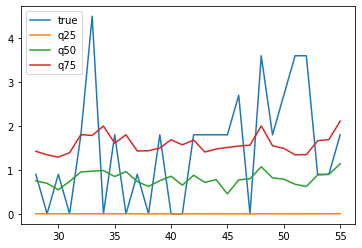

In [52]:
Yv = yv.reshape((-1, 28))
k = np.random.randint(0, 42840)
#k = np.random.randint(0, 200)
print(ids[k, 0])
plt.plot(np.arange(28, 56), Yv[k], label="true")
plt.plot(np.arange(28, 56), pv[k ,:, 3], label="q25")
plt.plot(np.arange(28, 56), pv[k ,:, 4], label="q50")
plt.plot(np.arange(28, 56), pv[k, :, 5], label="q75")
plt.legend(loc="best")
plt.show()

In [65]:
names = [f"F{i+1}" for i in range(28)]
piv = pd.DataFrame(ids[:, 0], columns=["id"])
QUANTILES = ["0.005", "0.025", "0.165", "0.250", "0.500", "0.750", "0.835", "0.975", "0.995"]
VALID = []
EVAL = []

for i, quantile in tqdm(enumerate(QUANTILES)):
    t1 = pd.DataFrame(pv[:,:, i]*sv, columns=names)
    t1 = piv.join(t1)
    t1["id"] = t1["id"] + f"_{quantile}_validation"
    t2 = pd.DataFrame(pe[:,:, i]*se, columns=names)
    t2 = piv.join(t2)
    t2["id"] = t2["id"] + f"_{quantile}_evaluation"
    VALID.append(t1)
    EVAL.append(t2)

9it [00:00, 26.26it/s]


In [66]:
sub = pd.DataFrame()
sub = sub.append(VALID + EVAL)
del VALID, EVAL, t1, t2
sub.head()
sub.to_csv("quantilesubmission.csv", index=False)

In [67]:
sub.shape

(771120, 29)

# Averaging

In [83]:
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
import os
def load_data():
    '''load 2 single submission files
    '''
    submission1 = pd.read_csv('uncertainty.csv')
    submission2 = pd.read_csv('quantilesubmission.csv')
    print('dataset 1 has {} rows and {} columns'.format(submission1.shape[0],
                                                        submission1.shape[1]))
    print('dataset 2 has {} rows and {} columns'.format(submission2.shape[0],
                                                        submission2.shape[1]))
    return submission1, submission2 
col = ['F' + str(i + 1) for i in range(28)] # generate column names

def recode_negative(df):
    '''recode negative value to 0
    '''
    df[col] = np.where(df[col] < 0, 0, df[col])
    return df

In [84]:
def averaging():
    '''model averaging
    '''
    start = time.time() 
    submission1, submission2 = load_data() 
    submission1 = recode_negative(submission1)
    submission2 = recode_negative(submission2)
    fusion = pd.concat([submission1,submission2])
    print('Our dataset has {} rows and {} columns'.format(fusion.shape[0], fusion.shape[1]))
    gpmean = fusion.groupby(['id']).mean()
    gpmean = pd.DataFrame(gpmean)
    gpmean['id'] = gpmean.index
    gpmean = recode_negative(gpmean)
    print('Our dataset has {} rows and {} columns'.format(gpmean.shape[0], gpmean.shape[1]))
    gpmean.to_csv('ensembledsubmission.csv', index = False)
    print('This program costs %7.2f seconds'%(time.time() - start))


In [85]:
averaging()

dataset 1 has 771120 rows and 29 columns
dataset 2 has 771120 rows and 29 columns
Our dataset has 1542240 rows and 29 columns
Our dataset has 771120 rows and 29 columns
This program costs   34.28 seconds
